<a href="https://colab.research.google.com/github/saadkiet/CNN-FOR-BREAST-CANCER-DETECTION/blob/master/CNN_FOR_BREAST_CANCER_DETECTION(PROJECT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 : Set up and Install

In [0]:
pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 36kB/s 
     |████████████████████████████████| 450kB 41.5MB/s 
     |████████████████████████████████| 3.9MB 41.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=77bd731f5c7cab83ed65e434dadeb517ac6934c76da6719048a1140c9f82b84f
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [0]:
print(tf.__version__)

2.1.0


In [0]:
from tensorflow.keras.layers import Dense,Conv2D,Conv1D,Flatten,MaxPool2D,MaxPool1D,BatchNormalization,Dropout, Input

In [0]:
from tensorflow.keras.models import Model, Sequential

# Step 2 : Importing Breast Cancer Dataset

In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
cancer=load_breast_cancer()

In [0]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
x=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)

In [0]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
y=cancer.target

In [0]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#xtrain,ytrain,xtest,ytest=train_test_split(x, y, test_size = 0.2, random_state = 0)

In [0]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size = 0.2, random_state = 0)

In [0]:
xtrain.shape, xtest.shape

((455, 30), (114, 30))

In [0]:
ytest.shape, ytrain.shape

((114,), (455,))

In [0]:
#Feature scaling
#the reason for doing it because dataset has very different values.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [0]:
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [0]:
xtrain

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [0]:
xtrain.max(),xtrain.min()

(11.731855390439579, -3.176344188780568)

In [0]:
xtrain.shape

(455, 30)

In [0]:
xtrain=np.expand_dims(xtrain,-1)

In [0]:
xtrain.shape,xtest.shape

((455, 30, 1), (114, 30))

In [0]:
#To process this dataset,we have to process this dataset from 1D to 2D
#x_train=x_train.reshape(455,30,1)
xtest=xtest.reshape(114,30,1)

In [0]:
xtest.shape

(114, 30, 1)

# Step 3 : Building the CNN model

In [0]:
i=Input(shape=(30, 1))
x= Conv1D(32,kernel_size=2,padding='same')(i)
x= BatchNormalization()(x)
x= Conv1D(32,kernel_size=2,padding='same')(x)
x= BatchNormalization()(x)
#x= MaxPool1D(pool_size=(2,2))

x= Conv1D(64,kernel_size=2,padding='same')(i)
x= BatchNormalization()(x)
x= Conv1D(64,kernel_size=2,padding='same')(x)
x= BatchNormalization()(x)
#x= MaxPool1D(pool_size=(2,2))

x= Flatten()(x)
x=Dense(128,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(1,activation='sigmoid')(x)


model= Model(i,x)

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30, 1)]           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 30, 64)            192       
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 64)            256       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 30, 64)            8256      
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 64)            256       
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               245888

In [0]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00004)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
r=model.fit(xtrain,ytrain,epochs=100,validation_data=(xtest,ytest))

Train on 455 samples, validate on 114 samples
Epoch 1/100
455/455 [==============================] - 1s 2ms/sample - loss: 0.5276 - accuracy: 0.7451 - val_loss: 0.5564 - val_accuracy: 0.9561
Epoch 2/100
455/455 [==============================] - 0s 368us/sample - loss: 0.2205 - accuracy: 0.9121 - val_loss: 0.4761 - val_accuracy: 0.9474
Epoch 3/100
455/455 [==============================] - 0s 351us/sample - loss: 0.1546 - accuracy: 0.9429 - val_loss: 0.4281 - val_accuracy: 0.9561
Epoch 4/100
455/455 [==============================] - 0s 367us/sample - loss: 0.1257 - accuracy: 0.9626 - val_loss: 0.3923 - val_accuracy: 0.9649
Epoch 5/100
455/455 [==============================] - 0s 381us/sample - loss: 0.1321 - accuracy: 0.9604 - val_loss: 0.3603 - val_accuracy: 0.9649
Epoch 6/100
455/455 [==============================] - 0s 351us/sample - loss: 0.1084 - accuracy: 0.9560 - val_loss: 0.3382 - val_accuracy: 0.9649
Epoch 7/100
455/455 [==============================] - 0s 369us/sample - l

# Step 4 : Making Predictions

In [0]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [0]:
P = model.predict(xtest)
print(P)

[[3.1459989e-04]
 [9.1050518e-01]
 [9.9939013e-01]
 [9.9482477e-01]
 [9.9984646e-01]
 [9.9985600e-01]
 [9.9999428e-01]
 [9.9990952e-01]
 [9.9999976e-01]
 [1.0000000e+00]
 [8.9103395e-01]
 [9.7826409e-01]
 [9.9999666e-01]
 [7.6631498e-01]
 [5.6252879e-01]
 [6.4544813e-03]
 [9.9980980e-01]
 [1.4073796e-06]
 [2.5945072e-04]
 [1.0300786e-10]
 [2.3450759e-04]
 [2.2161177e-03]
 [9.9789196e-01]
 [9.9937040e-01]
 [1.7632137e-03]
 [9.9988031e-01]
 [9.9999237e-01]
 [3.4460397e-03]
 [9.9943346e-01]
 [1.9937161e-06]
 [9.9998617e-01]
 [1.3133463e-04]
 [9.0884918e-01]
 [6.8577105e-04]
 [9.9999988e-01]
 [2.7472380e-04]
 [9.6567076e-01]
 [2.5627043e-04]
 [9.9769151e-01]
 [2.6749558e-04]
 [2.0986218e-02]
 [9.9996996e-01]
 [8.1394531e-02]
 [9.9999309e-01]
 [9.9314660e-01]
 [3.0058886e-10]
 [1.0000000e+00]
 [9.8492819e-01]
 [9.9997437e-01]
 [2.0300743e-06]
 [6.5080712e-05]
 [2.0579913e-01]
 [6.9740181e-06]
 [9.9976343e-01]
 [9.9866033e-01]
 [9.9995947e-01]
 [9.9977273e-01]
 [9.9994516e-01]
 [9.8914790e-0

In [0]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
P = np.round(P).flatten()
print(P)

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.]


In [0]:
cm1=confusion_matrix(P,ytest)
print(cm1)

[[45  0]
 [ 2 67]]


In [0]:
print(accuracy_score(P,ytest))

0.9824561403508771


# Step 5 : Evaluating Model

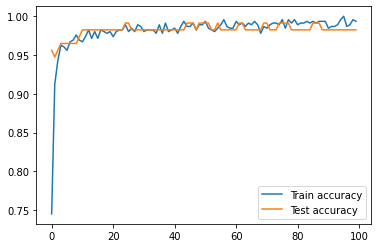

In [0]:
plt.plot(r.history['accuracy'],label='Train accuracy')
plt.plot(r.history['val_accuracy'],label='Test accuracy')
plt.legend()

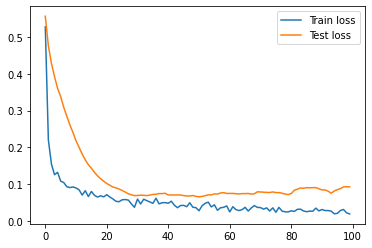

In [0]:
plt.plot(r.history['loss'],label='Train loss')
plt.plot(r.history['val_loss'],label='Test loss')
plt.legend()